### 1. Importing the Libraries

In [31]:
import pandas as pd

### 2. Importing the Dataset

In [32]:
data = pd.read_csv('heart (1).csv')

### 3. Taking Care of Missing Values

In [33]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### 4. Taking Care of Duplicate Values

In [34]:
data_dup = data.duplicated().any()

In [35]:
data_dup

True

In [36]:
data = data.drop_duplicates()

In [37]:
data_dup = data.duplicated().any()

In [38]:
data_dup

False

### 5. Data Processing

In [39]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [40]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [41]:
cont_val

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

### 6. Encoding Categorical Data

In [42]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [43]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [44]:
cate_val.remove('sex')
cate_val.remove('output')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [45]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 7. Feature Scaling

In [46]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,1,145,233,150,2.3,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,1,130,250,187,3.5,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,0,130,204,172,1.4,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,1,120,236,178,0.8,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,0,120,354,163,0.6,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [49]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


### 8. Splitting The Dataset Into The Training Set And Test Set

In [52]:
X = data.drop('output',axis=1)

In [53]:
y = data['output']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [56]:
y_test

180    0
229    0
111    1
247    0
60     1
      ..
250    0
104    1
300    0
194    0
185    0
Name: output, Length: 61, dtype: int64

### 9. Logistic Regression

In [57]:
data.head()

,age,sex,trtbps,chol,thalachh,oldpeak,output,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.949794,1,0.764066,-0.261285,0.018826,1.084022,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.928548,1,-0.091401,0.067741,1.636979,2.118926,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.485726,0,-0.091401,-0.822564,0.980971,0.307844,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.174856,1,-0.661712,-0.203222,1.243374,-0.209608,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.285561,0,-0.661712,2.080602,0.587366,-0.382092,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [60]:
y_pred1 = log.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred1)

0.9016393442622951

### 10. SVC

In [63]:
from sklearn import svm

In [64]:
svm = svm.SVC()

In [65]:
svm.fit(X_train,y_train)

SVC()

In [66]:
y_pred2 = svm.predict(X_test)

In [67]:
accuracy_score(y_test,y_pred2)

0.8688524590163934

### 11. KNeighbors Classifier

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
knn = KNeighborsClassifier()

In [70]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [71]:
y_pred3=knn.predict(X_test)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [72]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [73]:
score = []

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [74]:
score

[0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426,
 0.8524590163934426,
 0.8688524590163934,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8524590163934426,
 0.8688524590163934,
 0.8360655737704918,
 0.8524590163934426,
 0.8360655737704918,
 0.8524590163934426,
 0.8524590163934426]

In [75]:
import matplotlib.pyplot as plt

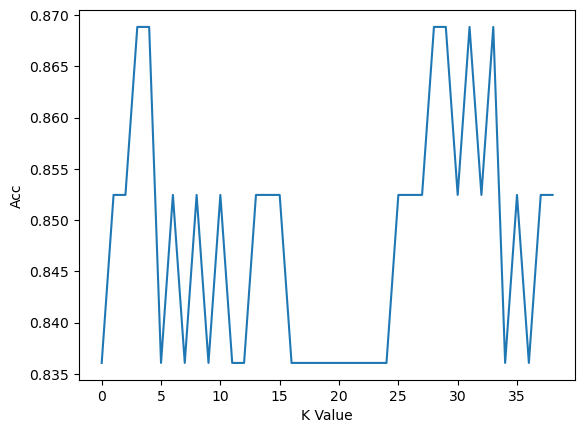

In [76]:
plt.plot(score)
plt.xlabel("K Value")
plt.ylabel("Acc")
plt.show()

In [77]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8524590163934426

### Non-Linear ML Algorithms

In [81]:
data = pd.read_csv('heart (1).csv')

In [82]:
data = data.drop_duplicates()

In [83]:
X = data.drop('output',axis=1)
y=data['output']

In [84]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

### 12. Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt = DecisionTreeClassifier()

In [87]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [88]:
y_pred4= dt.predict(X_test)

In [89]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

### 13. Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf = RandomForestClassifier()

In [92]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [93]:
y_pred5= rf.predict(X_test)

In [94]:
accuracy_score(y_test,y_pred5)

0.8688524590163934

### 14. Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
gbc = GradientBoostingClassifier()

In [97]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [98]:
y_pred6 = gbc.predict(X_test)

In [99]:
accuracy_score(y_test,y_pred6)

0.8524590163934426

In [100]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'ACC':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [101]:
final_data

,Models,ACC
0,LR,90.163934
1,SVM,86.885246
2,KNN,86.885246
3,DT,78.688525
4,RF,86.885246
5,GB,85.245902


In [102]:
import seaborn as sns

C:\Users\varsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

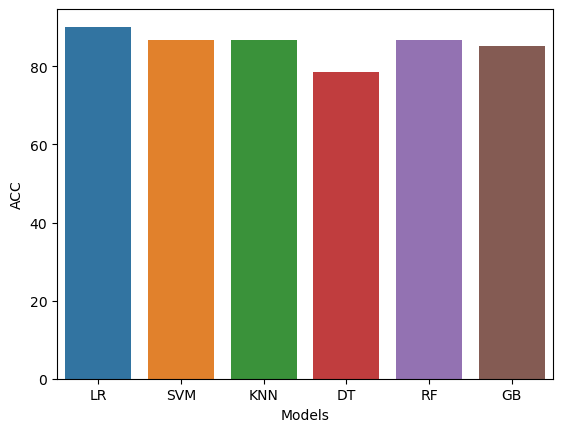

In [103]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [104]:
X=data.drop('output',axis=1)
y=data['output']

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
log = LogisticRegression()
log.fit(X,y)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 15. Prediction on New Data

In [108]:
import pandas as pd

In [109]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [110]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [111]:
p = log.predict(new_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


C:\Users\varsh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- slope
- thal
- thalach
- ...
Feature names seen at fit time, yet now missing:
- caa
- exng
- slp
- thalachh
- thall
- ...

  warnings.warn(message, FutureWarning)


### 16. Save Model Using Joblib

In [112]:
import joblib

In [113]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [114]:
model = joblib.load('model_joblib_heart')

In [115]:
model.predict(new_data)

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ca
- exang
- slope
- thal
- thalach
- ...
Feature names seen at fit time, yet now missing:
- caa
- exng
- slp
- thalachh
- thall
- ...

  warnings.warn(message, FutureWarning)


array([0], dtype=int64)

In [116]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### GUI

In [120]:
from tkinter import *
import joblib
from tkinter import messagebox

In [121]:
#global a1
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    
    model = joblib.load('model_joblib_heart')
    
    
    if p4<120 and p5<130 and p6<140 and p8<150:
        
        messagebox.showinfo("RESULT","No Heart Disease is detected ")
        
        
    elif p4>180 or p5>250 or p6>250:  
        
        messagebox.showinfo("RESULT","possibility of heart disease ")    
        
        
        
#     elif p1>35 and p4>120 and p5>130 and p6>150:  
        
#         messagebox.showinfo("RESULT","possibility of heart disease 2")
        
#     elif p1<35 and p4<120 and p5<130 and p6<150:  
        
#         messagebox.showinfo("RESULT","possibility of heart disease 3")









        
        
#     if p1 < 25:
#         if p4<120 : #resting blood pressure
#             messagebox.showinfo("RESULT","No Heart Disease is detected aa")
            
#         elif p5<140: #cholestrol
#             messagebox.showinfo("RESULT","No Heart Disease is detected aa")

#         elif p6<120:  #sugar level
#             messagebox.showinfo("RESULT","No Heart Disease is detected aa")  
            
#         elif p8<120: #Maximum heart rate
#             messagebox.showinfo("RESULT","No Heart Disease is detected aa")    

#         else:

# #             messagebox.showinfo("RESULT","possibility ,of heart disease")
            
#             result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
        
#         if result == 0:
#             messagebox.showinfo("RESULT","No Heart Disease is detected")
#             #a1=Label(master, text="No Heart Disease").grid(row=33,column=1)
            
#        else:
#             messagebox.showinfo("RESULT","Possibility of Heart Disease")
#         #a1=Label(master, text="Possibility of Heart Disease").grid(row=33,column=1)
        
#     if p1>25:
#         if p4>120 : #resting blood pressure
#             messagebox.showinfo("RESULT","Possibility of Heart Disease ")
            
#                elif p5>140: #cholestrol
#                       messagebox.showinfo("RESULT","Possibility of Heart Disease")
  
#                elif p6>120:  #sugar level
#                       messagebox.showinfo("RESULT","Possibility of Heart Disease")  
            
#                elif p8>120: #Maximum heart rate
#                       messagebox.showinfo("RESULT","Possibility of Heart Disease")    
            
#                else:
#                       messagebox.showinfo("RESULT","Possibility of Heart Disease")   

    else:

            #messagebox.showinfo("RESULT","possibility ,of heart disease")
            
            result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
            
            if result == 0:
                messagebox.showinfo("RESULT","No Heart Disease is detected")
        #a1=Label(master, text="No Heart Disease").grid(row=33,column=1)
            else :
                messagebox.showinfo("RESULT","Possibility of Heart Disease")
        #a1=Label(master, text="Possibility of Heart Disease").grid(row=33,column=1)


        
       


    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)
 

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Chest Pain type[0/1/2/3]").grid(row=3)
Label(master, text="Resting Blood pressure").grid(row=4)
Label(master, text="Cholestrol levels").grid(row=5)
Label(master, text="Fasting Blood Sugar levels").grid(row=6)
Label(master, text="Restecg results[0/1/2]").grid(row=7)
Label(master, text="Maximum Heart Rate").grid(row=8)
Label(master, text="ExAng[0/1]").grid(row=9)
Label(master, text="Oldpeak value in ST slope").grid(row=10)
Label(master, text="Enter Value of slope[1/2/3]").grid(row=11)
Label(master, text="NO. of colored cells[0-3]").grid(row=12)
Label(master, text="Type of defect in heartbeat").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)


e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)




Button(master, text='Predict', command=show_entry_fields).grid(row=33,column=0)
        

def clear_fields():
    # Clear all entry fields
    e1.delete(0, END)
    e2.delete(0, END)
    e3.delete(0, END)
    e4.delete(0, END)
    e5.delete(0, END)
    e6.delete(0, END)
    e7.delete(0, END)
    e8.delete(0, END)
    e9.delete(0, END)
    e10.delete(0, END)
    e11.delete(0, END)
    e12.delete(0, END)
    e13.delete(0, END)


    
    # Clear any output labels
    
    
    
    
    
    
    #a1.destory()

# Add a "Clear" button
Button(master, text="Clear", command=clear_fields).grid(row=33, column=1)


mainloop()

C:\Users\varsh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
